In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import networkx as nx
import pandas as pd

In [2]:
# G = nx.read_edgelist("email-Eu-core.txt.gz")
G = nx.read_gml("ps_graph.gml")
# G = nx.read_gml("as-22july06.gml")

In [3]:
# community_df = pd.read_csv("email-Eu-core-department-labels.txt.gz", sep=" ", index_col=0)
# community_df.columns = ["community"]
# community_df.index = [str(i) for i in community_df.index]
# community_dict = community_df["community"].to_dict()

In [4]:
# nx.set_node_attributes(G, "community", community_dict)

In [5]:
# nodes_to_keep = []
# for n, d in G.nodes(data=True):
    
#     if "community" in d:
#         nodes_to_keep.append(n)
        
# G = G.subgraph(nodes_to_keep)

In [6]:
G = max(nx.connected_component_subgraphs(G), key=len)

In [7]:
# communities = [G.node[str(n)]["community"] for n in sorted_nodes]

In [8]:
N = nx.number_of_nodes(G)

In [9]:
degrees = nx.degree(G)

# sort keys into integer order
sorted_nodes = np.array([int(n) for n in degrees.keys()])
sorted_nodes.sort()

# construct array of degrees in integer order of nodes
degrees = np.array([degrees[int(n)] for n in sorted_nodes])
degree_sort = degrees.argsort()[::-1]

# when did each node appaear in the network (i)
order_of_appearance = np.array([np.where(degree_sort==n)[0][0] + 1 for n in sorted_nodes])

In [10]:
# 4th node appeared 7th (starting from 1)
order_of_appearance[:10]

array([ 1,  2,  4,  3,  7,  6,  9, 19,  5, 17])

In [11]:
polar_df = pd.read_csv("polar_coords.txt", delimiter="\t")
polar_coords = polar_df.values
polar_coords = polar_coords[order_of_appearance-1]
# true_coords = {n: {"r" : x[0], "theta" : x[1]} for n, x in zip(sorted_nodes, polar_coords)}
R_true = polar_coords[:,0]
thetas_true = polar_coords[:,1]

In [12]:
# number of attributes 
num_att = 100

In [13]:
# number of communities
C = 100

In [14]:
# artificially create binary attributes from radial coordinates
X = np.zeros((N, num_att))

for n, theta in enumerate(thetas_true):
    
    id = int(theta * num_att / (2 * np.pi))
# for i, community in enumerate(communities):
    
#     id = int(community * num_att / float(C))
    
    p = np.array([np.exp(-(id-x)**2 / (2 * (10.0)**2) ) for x in range(num_att)])
    
    r = np.random.rand(num_att)
    
    X[n][r < p] = 1

In [15]:
# observed adjacancy matrix
A = np.array(nx.adjacency_matrix(G).todense())

In [16]:
# import powerlaw

# result = powerlaw.Fit(degrees)
# gamma = result.alpha

In [17]:
# gamma = min(gamma, 3)

In [18]:
# PS model parameters -- to estimate in real world network
m = degrees.mean() / 2
T = 0.1
gamma = 2.3
beta = 1. / (gamma - 1)

In [19]:
# determine radial coordinates of nodes
R = 2 * beta * np.log(range(1, N + 1)) + 2 * (1 - beta) * np.log(N) 
R = R[order_of_appearance-1]

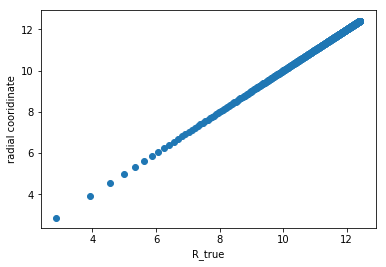

In [20]:
plt.scatter(R_true, R)
plt.xlabel("R_true")
plt.ylabel("radial cooridinate")

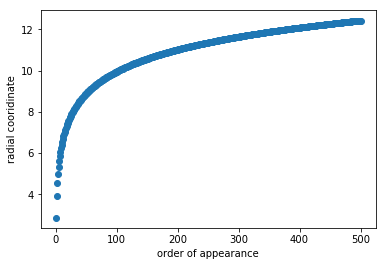

In [21]:
plt.scatter(order_of_appearance, R)
plt.xlabel("order of appearance")
plt.ylabel("radial cooridinate")

In [22]:
def compute_disk_radius(order_of_appearance, R):
    I = (1 - order_of_appearance ** -(1 - beta)) / (1 - beta)
    disk_radii =  R - 2 * np.log((2 * T * I) / (np.sin(np.pi * T) * m))
    return disk_radii

In [23]:
disk_radii = compute_disk_radius(order_of_appearance, R)

/home/david/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


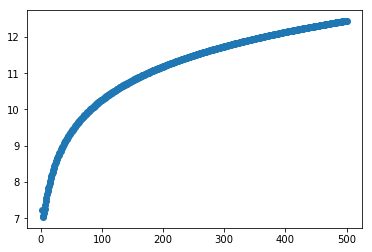

In [24]:
# plt.scatter(order_of_appearance, 2 * np.log((2 * T * (1 - np.exp(- (1 - beta) * np.log(order_of_appearance)))) / 
#                                    (m * (1 - beta) * np.sin(np.pi * T))))
# plt.scatter(order_of_appearance, R)
plt.scatter(order_of_appearance, disk_radii)

In [25]:
zip(order_of_appearance, disk_radii)

[(1, inf),
 (2, 7.2303230590296765),
 (4, 7.0639762612957435),
 (3, 7.0233412249230742),
 (7, 7.367619980633366),
 (6, 7.2625043520040951),
 (9, 7.5647195323899989),
 (19, 8.2843189378729001),
 (5, 7.1573065310248447),
 (17, 8.1673796382504236),
 (26, 8.6282411034232549),
 (8, 7.4687518531113053),
 (12, 7.8216666646097419),
 (13, 7.8980896691204192),
 (31, 8.8291020030801288),
 (24, 8.5386408491703136),
 (11, 7.7408864473420147),
 (16, 8.104878654591376),
 (23, 8.4914895191538893),
 (25, 8.5841895424136787),
 (38, 9.0677993347902923),
 (15, 8.0393595764650918),
 (30, 8.7912627051729082),
 (44, 9.243381188305726),
 (21, 8.3918990606369341),
 (14, 7.9705363783086902),
 (27, 8.6708911278197398),
 (47, 9.3233103218909168),
 (76, 9.9211331642234999),
 (20, 8.3391861028947236),
 (29, 8.7523262428130231),
 (10, 7.655357118283491),
 (50, 9.3987924067682798),
 (98, 10.246953773004481),
 (18, 8.2271174452087905),
 (59, 9.6029613585908731),
 (35, 8.9706313582862336),
 (46, 9.2971872901826025),
 (

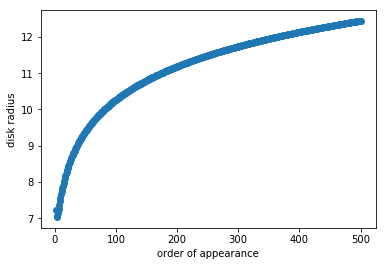

In [26]:
plt.scatter(order_of_appearance, disk_radii)
plt.xlabel("order of appearance")
plt.ylabel("disk radius")

In [27]:
disk_radii_2d = np.array([[disk_radii[i] if order_of_appearance[i] > order_of_appearance[j] else disk_radii[j]
                           for j in range(N)] for i in range(N)]) 

In [28]:
from keras.models import Model
from keras.layers import Input, Dense, Lambda
from keras.constraints import non_neg
from keras.initializers import RandomUniform, RandomNormal
from keras.regularizers import l1, l2
# from keras.optimizers import SGD
import keras.backend as K

Using TensorFlow backend.


In [31]:
def cosh(x):
    return (K.exp(x) + K.exp(-x)) / 2

def sinh(x):
    return (K.exp(x) - K.exp(-x)) / 2

def arccosh(x):
    return K.log(x + K.sqrt(x + 1) * K.sqrt(x - 1))

def hyperbolic_distance(args):
    
    r_u, r_v, theta_u, theta_v = args
    
    # compute hyperbolic distance 
    pi = K.constant(np.pi)
    delta = pi - K.abs(pi - K.abs(theta_u - theta_v))
    h_uv = cosh(r_u) * cosh(r_v) - sinh(r_u) * sinh(r_v) * K.cos(delta) 
    h_uv = K.maximum(1.0, h_uv)
    h_uv = arccosh(h_uv)
    
    return h_uv

# def compute_theta(args):
    
#     x = args[:,0]
#     y = args[:,1]
    
#     return tf.atan2(y, x)

# def compute_connection_probability(args):
    
#     F_u, F_v = args
    
#     return 1 - K.exp( - K.dot(F_u, F_v))

def compute_connection_probability(args):
    
    disk_radii_uv, h_uv = args
    
    return K.sigmoid((disk_radii_uv - h_uv) / (2 * T))

In [125]:
from keras.engine.topology import Layer
from keras.initializers import Zeros

In [133]:
class F_Layer(Layer):

    def __init__(self, output_dim, **kwargs):
        self.output_dim = output_dim
        super(F_Layer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Create a trainable weight variable for this layer.
        self.kernel = self.add_weight(name='F', 
                                      shape=(input_shape[1], self.output_dim),
                                      initializer='uniform', constraint="non_neg", regularizer=1e-2,
                                      trainable=True)
        super(MyLayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        return K.dot(x, self.kernel)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

In [135]:
# build model
reg_F = l1(1e-20)
reg_W = l1(1e-2)
reg_M = l1(1e-20)

u = Input(shape=(N,))
v = Input(shape=(N,))

r_u = Input(shape=(1,))
r_v = Input(shape=(1,))

disk_radii_uv = Input(shape=(1,))

F = F_Layer(C, name="F",)
#           kernel_constraint=non_neg(), bias_constraint=non_neg(),
#          kernel_regularizer=reg_F, bias_regularizer=reg_F, )
#           kernel_initializer=RandomUniform(minval=0, maxval=10), bias_initializer=Zeros())
# F.bias.trainable = False

F_u = F(u)
F_v = F(v)


M = Dense(1, name="M",
         kernel_regularizer=reg_M, bias_regularizer=reg_M, ) 
# #           kernel_initializer=RandomNormal(stddev=w),
# #           bias_initializer=RandomNormal(stddev=w) )
        
theta_u = M(F_u)
theta_v = M(F_v)

h_uv = Lambda(hyperbolic_distance, output_shape=(1,), name="hyperbolic_distance_layer")([r_u, r_v, theta_u, theta_v])
P_uv = Lambda(compute_connection_probability, output_shape=(1,), name="P")([disk_radii_uv, h_uv])

W = Dense(num_att, activation="sigmoid", name="Q",
    kernel_regularizer=reg_W, bias_regularizer=reg_W, )
#           kernel_initializer=RandomNormal(stddev=w),
#           bias_initializer=RandomNormal(stddev=w))
Q_u = W(F_u)
Q_v = W(F_v)

generative_model = Model([u, v, r_u, r_v, disk_radii_uv], [P_uv, Q_u, Q_v])
P_model = Model([u, v, r_u, r_v, disk_radii_uv], P_uv )
Q_model = Model(u, Q_u)

TypeError: 'float' object is not callable

In [109]:
def generator(batch_size):
    
    
    I = np.identity(N)
    
    nodes = range(N)
    U = np.repeat(nodes, N)
    V = np.concatenate([nodes for i in range(N)])
    
    batch = 0
    
    num_batches = N ** 2 / batch_size
    
    while True:
        
        if batch == 0:
            np.random.shuffle(U)
            np.random.shuffle(V)
            batch_order = np.random.permutation(num_batches)
            
        batch_range = range(batch_order[batch] * batch_size, (batch_order[batch] + 1) * batch_size)

        
        u = U[batch_range]
        v = V[batch_range]
        
#         u = np.random.choice(data, replace=True, size=batch_size)
#         v = np.random.choice(data, replace=True, size=batch_size)
        
        yield [I[u], I[v], R[u, None], R[v, None], disk_radii_2d[u, v, None]], [A[u, v, None], X[u], X[v]]
        
        batch = (batch + 1) % num_batches 
        
# def P_generator(batch_size):
    
    
#     I = np.identity(N)
    
#     nodes = range(N)
#     U = np.repeat(nodes, N)
#     V = np.concatenate([nodes for i in range(N)])
    
#     batch = 0
    
#     num_batches = N ** 2 / batch_size
    
#     while True:
        
#         if batch == 0:
#             np.random.shuffle(U)
#             np.random.shuffle(V)
#             batch_order = np.random.permutation(num_batches)
            
#         batch_range = range(batch_order[batch] * batch_size, (batch_order[batch] + 1) * batch_size)

        
#         u = U[batch_range]
#         v = V[batch_range]
        
# #         u = np.random.choice(data, replace=True, size=batch_size)
# #         v = np.random.choice(data, replace=True, size=batch_size)
        
#         yield [I[u], I[v], R[u, None], R[v, None], disk_radii_2d[u, v, None]], [A[u, v, None]]
        
#         batch = (batch + 1) % num_batches 
        
# def Q_generator(batch_size):
    
#     I = np.identity(N)

#     U = np.arange(N)
    
#     batch = 0
    
#     num_batches = N / batch_size
    
#     while True:
        
#         if batch == 0:
#             np.random.shuffle(U)
#             batch_order = np.random.permutation(num_batches)
            
#         batch_range = range(batch_order[batch] * batch_size, (batch_order[batch] + 1) * batch_size)

        
#         u = U[batch_range]
        
#         yield I[u], X[u]
        
#         batch = (batch + 1) % num_batches 

In [110]:
from keras_tqdm import TQDMNotebookCallback
tqdm = TQDMNotebookCallback(leave_outer=True, leave_inner=False)

In [111]:
batch_size = 1000

In [112]:
training_gen = generator(batch_size=batch_size)
# P_gen = P_generator(batch_size=batch_size)
# Q_gen = Q_generator(batch_size=batch_size)

In [113]:
alpha = 0.5

In [114]:
F.trainable=True
W.trainable=True
M.trainable=True

In [115]:
generative_model.compile(optimizer="adam", loss=["binary_crossentropy"] * 3, loss_weights=[1-alpha, alpha, alpha])

In [116]:
generative_model.fit_generator(training_gen, steps_per_epoch=100, epochs=1000, verbose=0, #)
                              callbacks=[ tqdm], )

KeyboardInterrupt: 

In [103]:
# models = [generative_model, Q_model, P_model]
# generators = [training_gen, Q_gen, P_gen]

In [56]:
# from sys import stdout

# # block gradient ascent
# for e in range(10):
    
#     for i in range(3):
        
#         if i == 0:
#             F.trainable=True
#             W.trainable=False
#             M.trainable=False

#         elif i == 1:
#             F.trainable=False
#             W.trainable=True
#             M.trainable=False
#         else:
#             F.trainable=False
#             W.trainable=False
#             M.trainable=True

#         generative_model.fit_generator(training_gen, steps_per_epoch=1, epochs=1, verbose=0, )

    
#     evaluation = generative_model.evaluate_generator(training_gen, steps=1)
    
#     if e % 100 == 0:
#         print "\nEpoch:{} Loss:{}".format(e, evaluation)
    
#     stdout.write("\rEpoch:{} Loss:{}".format(e, evaluation))


11/|/[loss: 0.683, P_loss: 0.166, Q_loss: 0.540, Q_loss: 0.540]  11%|| 11/100 [00:13<00:01, 46.79it/s]

In [251]:
nodes = range(N)
I = np.identity(N)

U = np.repeat(nodes, N)
V = np.concatenate([nodes for i in range(N)])

In [252]:
P_predictions = P_model.predict([I[U], I[V], R[U], R[V], disk_radii_2d[U, V]])

In [253]:
P_predictions = P_predictions.reshape(A.shape)

In [266]:
A_clip = np.clip(A, a_min=1e-6, a_max=1-1e-6)
P_clip = np.clip(P_predictions, a_min=1e-6, a_max=1-1e-6)

In [125]:
F_weights, F_bias = F.get_weights()
W_weights, W_bias = W.get_weights()

In [132]:
Q_model.fit(np.identity(N), X, epochs=1000, verbose=0, callbacks=[])

In [133]:
Q_model.history.history["loss"][-1]

0.53531014060974125

In [134]:
F_weights_new, F_bias_new = F.get_weights()
W_weights_new, W_bias_new = W.get_weights()

In [135]:
np.allclose(F_weights, F_weights_new)

False

In [136]:
np.allclose(W_weights, W_weights_new)

False

In [58]:
angular_embedder = Model(u, theta_u)
angular_embedder.compile(loss="mse", optimizer="adam")

In [59]:
# angular_embedder.fit(np.identity(N), thetas_true, epochs=10000, verbose=0, callbacks=[tqdm])

In [60]:
thetas = angular_embedder.predict(np.identity(N))
thetas = thetas.flatten()

In [61]:
# plt.figure(figsize=(15, 15))
# plt.scatter(thetas_true, thetas)
# plt.xlabel("true theta")
# plt.ylabel("predicted theta")

In [117]:
community_model = Model(u, F_u)
community_predictions = community_model.predict(np.identity(N))

In [118]:
community_predictions[0]

array([ 0.69453305,  1.43283808,  7.91871405,  0.57885772,  4.949543  ,
        2.58968234,  5.9139924 ,  9.72480774,  5.85948563,  0.88396865,
        4.65690231,  9.01104164,  1.59238696,  3.88026953,  7.58635664,
        7.99494028,  5.87943602,  8.93835354,  1.96831501,  2.50646162,
        3.21395159,  6.74945068,  7.51004028,  5.57040501,  4.47723579,
        1.10347021,  3.9278965 ,  0.68775123,  1.51442552,  3.77472377,
        4.4122982 ,  3.54514003,  9.09152031,  8.47003555,  1.7817198 ,
        7.39026499,  4.91387463,  7.76240206,  5.01799297,  8.71160412,
        5.36801386,  8.69087887,  9.73563576,  4.31653976,  9.68086815,
        0.40723965,  8.96957016,  3.63844895,  3.08981609,  8.31411839,
        0.41923136,  0.08004429,  8.93023205,  5.32885551,  3.27683091,
        5.10650349,  6.17431068,  4.95692396,  8.61428452,  8.58050251,
        9.02120399,  3.39464474,  7.45004845,  1.40970075,  7.85937214,
        8.60671425,  6.23261356,  3.78289413,  4.37539911,  1.52

In [119]:
F_weights, F_bias = F.get_weights()

In [121]:
F_weights[0]

array([ 0.64190066,  1.35556293,  7.88148689,  0.56962705,  4.94159842,
        2.5853436 ,  5.87047148,  9.70401955,  5.80120468,  0.78906357,
        4.57259226,  8.97481346,  1.58513653,  3.7630055 ,  7.49220467,
        7.94259119,  5.84952974,  8.93108654,  1.95124149,  2.46781158,
        3.17987752,  6.69611788,  7.45971251,  5.55026484,  4.39826679,
        1.09363818,  3.90301895,  0.68179631,  1.40785253,  3.74778152,
        4.34456968,  3.51161695,  9.08740807,  8.45590782,  1.77825367,
        7.36690092,  4.88874817,  7.70331192,  4.93888903,  8.64080143,
        5.3592968 ,  8.66859818,  9.63065434,  4.30418587,  9.63270378,
        0.34957352,  8.89278698,  3.61901975,  3.08556342,  8.29228306,
        0.38187709,  0.0645456 ,  8.8850975 ,  5.28314066,  3.23810101,
        5.07832098,  6.10289049,  4.91715908,  8.55778408,  8.57189655,
        9.00648689,  3.38539362,  7.42528343,  1.40023184,  7.82656145,
        8.58667278,  6.23037434,  3.77278042,  4.37010384,  1.52

In [123]:
F_bias

array([ 0.05263239,  0.0772752 ,  0.0372273 ,  0.00923066,  0.00794482,
        0.00433879,  0.04352076,  0.02078818,  0.05828103,  0.0949051 ,
        0.08430997,  0.03622777,  0.00725044,  0.11726411,  0.09415175,
        0.05234927,  0.02990611,  0.00726711,  0.01707353,  0.03864999,
        0.03407399,  0.05333273,  0.05032764,  0.02013999,  0.07896881,
        0.00983207,  0.02487752,  0.00595495,  0.10657305,  0.02694226,
        0.06772868,  0.03352301,  0.00411234,  0.014128  ,  0.00346612,
        0.02336422,  0.02512662,  0.0590903 ,  0.07910406,  0.07080255,
        0.0087171 ,  0.02228097,  0.10498121,  0.01235383,  0.0481647 ,
        0.05766613,  0.07678308,  0.01942923,  0.00425262,  0.02183551,
        0.03735428,  0.01549869,  0.04513447,  0.04571484,  0.03872994,
        0.02818253,  0.07142015,  0.03976497,  0.05650087,  0.00860598,
        0.01471754,  0.00925109,  0.02476513,  0.00946888,  0.03281055,
        0.02004194,  0.00223923,  0.01011361,  0.00529538,  0.00

In [86]:
np.identity(N).dot(F_weights) + F_bias

array([[  2.9810667 ,  10.13114572,   3.40173125, ...,  11.8460393 ,
          9.73873973,  17.92929649],
       [  2.55676627,   4.73620057,   7.84982538, ...,  11.00316381,
         10.17182231,  16.674263  ],
       [ 11.39062786,   2.6421237 ,   4.52560544, ...,   5.57786703,
         13.53134537,  16.6434145 ],
       ..., 
       [  5.48220396,   4.75466728,   6.70077801, ...,  10.53860521,
         17.47498894,  15.41808605],
       [  6.34422207,   5.19214392,   6.3551271 , ...,   4.96452332,
         14.71946716,  16.81414795],
       [  1.72284961,  10.35521245,  12.86026049, ...,   3.9082706 ,
         16.50823116,  18.84808254]])

In [83]:
F_bias[0]

1.5471983

In [66]:
Q_model = Model(u, Q_u)

In [67]:
predicted_attributes = Q_model.predict(np.identity(N))

In [68]:
coords = np.column_stack([R * np.cos(thetas), R * np.sin(thetas)])

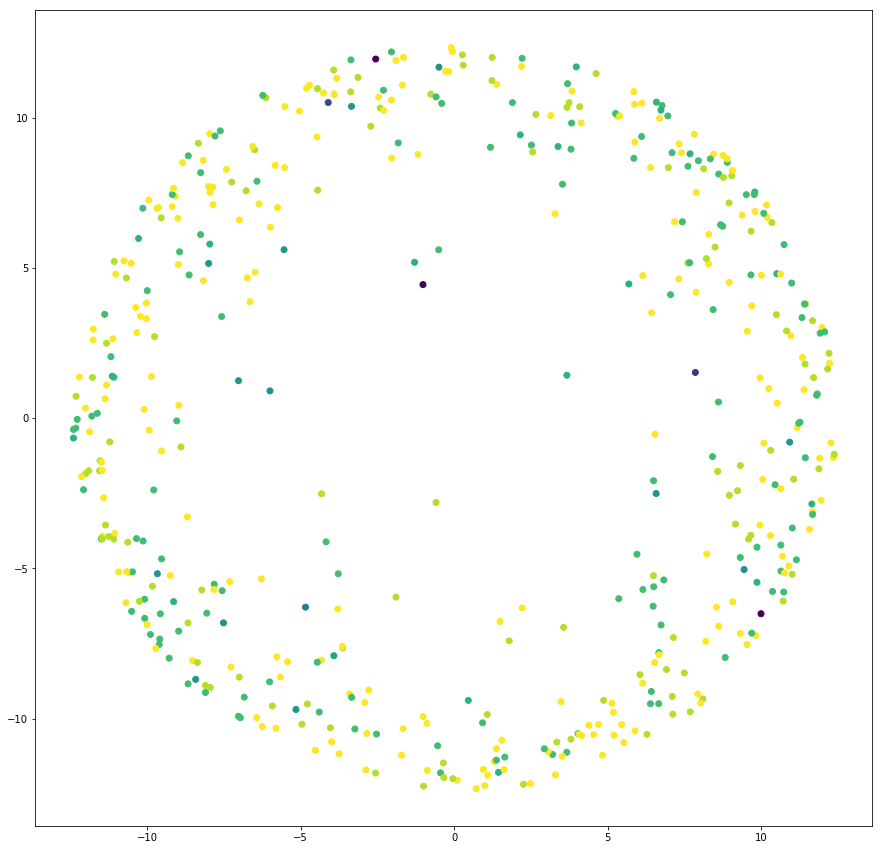

In [69]:
plt.figure(figsize=(15, 15))
# l = N
# for label, i, j in zip(G.nodes(), coords[:l, 0], coords[:l, 1]):
#     plt.annotate(
#         label,
#         xy=(i, j), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
# for label, i, j in zip(range(C), centre_coords[:, 0], centre_coords[:, 1]):
#     plt.annotate(
#         label,
#         xy=(i, j), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

# nodes = np.array(G.nodes())
# for n1, n2 in G.edges():
#     i, = np.where(nodes == n1)
#     j, = np.where(nodes == n2)
#     plt.plot(coords[(i, j), 0], coords[(i, j), 1], c="k", 
#              linewidth = 0.3)

plt.scatter(coords[:,0], coords[:,1], c = community_predictions.argmax(axis=1))

In [57]:
preds = community_predictions.argmax(axis=1)

In [58]:
for x in np.unique(preds):
    
    nodes = np.where(preds==x)[0]
    print x
    print nodes
    print [G.nodes()[n] for n in nodes]
    print nx.is_connected(G.subgraph([G.nodes()[n] for n in nodes]))
    print

0
[ 17  18  25  45  64  70  81  96  99 109 110 117 133 139 142 169 171 176
 183 196 197 204 238 244 277 285 287 290 292 293 318 321 322 331 334 349
 363 369 383 389 402 407 414 430 445 457 465 498]
[17, 18, 25, 45, 64, 70, 81, 96, 99, 109, 110, 117, 133, 139, 142, 169, 171, 176, 183, 196, 197, 204, 238, 244, 277, 285, 287, 290, 292, 293, 318, 321, 322, 331, 334, 349, 363, 369, 383, 389, 402, 407, 414, 430, 445, 457, 465, 498]
False

2
[ 57 148 177 227 390 447 495]
[57, 148, 177, 227, 390, 447, 495]
False

3
[ 34 165 190 195 209 219 286 316 378 400 426 487]
[34, 165, 190, 195, 209, 219, 286, 316, 378, 400, 426, 487]
False

7
[ 36  54  69 105 123 178 180 228 289 408 463 469 482]
[36, 54, 69, 105, 123, 178, 180, 228, 289, 408, 463, 469, 482]
False

16
[  4   9  55  63  65  66  84 101 132 151 157 170 185 223 272 309 313 325
 338 352 373 399 461 494 496]
[4, 9, 55, 63, 65, 66, 84, 101, 132, 151, 157, 170, 185, 223, 272, 309, 313, 325, 338, 352, 373, 399, 461, 494, 496]
False

19
[  0  48  4

In [58]:
thetas_true

array([  4.11995687e+00,   2.86884930e+00,   6.04025018e+00,
         8.53736377e-01,   1.03341878e+00,   5.62880341e+00,
         2.03727499e+00,   6.21162880e+00,   5.85157865e+00,
         1.33716382e+00,   2.21982868e+00,   7.05579890e-01,
         4.14763337e-01,   5.03968005e+00,   1.44106939e+00,
         3.22367218e+00,   9.56704349e-01,   5.46907047e+00,
         6.14563823e+00,   5.87751869e-01,   9.24841578e-01,
         5.50215508e+00,   1.90107984e+00,   4.47657653e+00,
         5.84446173e+00,   1.42328987e+00,   3.79876412e+00,
         4.86199057e+00,   6.29178827e-01,   5.13505632e+00,
         2.63963038e+00,   2.70680536e+00,   5.37771397e+00,
         5.28641479e+00,   3.78988913e-01,   2.40687433e+00,
         1.19760506e-01,   1.03777322e+00,   3.75288146e+00,
         4.92899972e+00,   9.60102910e-01,   3.69667837e+00,
         2.83831947e+00,   2.60376340e+00,   9.25806778e-01,
         1.34064356e+00,   5.38693931e+00,   3.81814293e+00,
         1.47176405e+00,

In [62]:
thetas[thetas < 0] += 2* np.pi